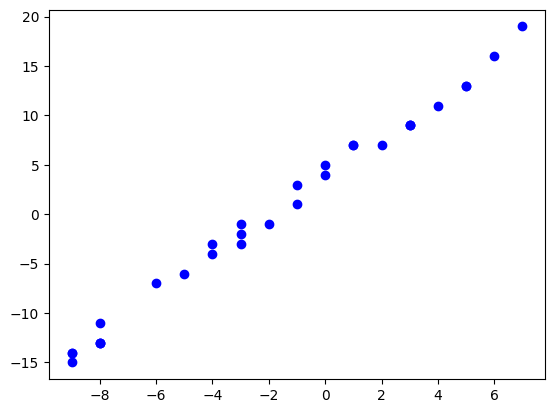

In [18]:
# 随机生成训练集 x 和标签 y
import numpy as np
import matplotlib.pyplot as plt
import random


w = 2
b = 3
xlim = [-10, 10]
x_train = np.random.randint(xlim[0], xlim[1], 30)
y_train = [w * x + b + random.randint(0, 2) for x in x_train]
# bo 表示蓝色圆点, 可以指定线条颜色和形状
plt.plot(x_train, y_train, 'bo')

In [19]:
# 训练回归模型 y = wx + b
import torch
import torch.nn as nn
import torch.optim as optim
import os


# nn.Module 是所有神经网络模块的基类(Base class of all neural network modules)
# 我们的模型应该继承这个类(Your models should also subclass this class)
class LinearModel(nn.Module):
    # __init__ 是类的构造函数, 用于初始化一些参数(Construct function), 必须实现
    def __init__(self):
        # super(LinearModel, self).__init__()
        super().__init__()
        self.w = nn.Parameter(torch.randn(1))
        self.b = nn.Parameter(torch.randn(1))

    # forward 定义了前向传播的运算(如何计算输出), 必须重写. Module类中的__call__方法会调用forward方法
    def forward(self, x):
        return self.w * x + self.b


# 创建模型
model = LinearModel()
# 定义优化器 随机梯度下降, weight_decay表示L2正则化, momentum表示动量
optimizer = optim.SGD(model.parameters(), lr=1e-4,
                      weight_decay=1e-2, momentum=0.9)

y_train = torch.tensor(y_train, dtype=torch.float32)
epoch = 1000
for _ in range(epoch):
    input = torch.from_numpy(x_train)
    # 前向传播
    output = model(input)
    # 计算损失
    loss = nn.MSELoss()(output, y_train)
    # 梯度清零
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 更新参数
    optimizer.step()

# 打印训练后的参数
print(model.w, model.b)
for name, param in model.named_parameters():
    print(name, param)

if not os.path.exists('./out'):
    os.mkdir('./out')

# 保存模型参数
torch.save(model.state_dict(), './out/linear_model.pth')

# 加载模型参数
linear_model = LinearModel()
linear_model.load_state_dict(torch.load('./out/linear_model.pth'))
# 设置为评估模式
linear_model.eval()
for param in linear_model.parameters():
    print(param)

# 保存整个模型
torch.save(model, './out/linear_model_with_arc.pth')
# 加载整个模型, 不需要创建模型了
linear_model2 = torch.load('./out/linear_model_with_arc.pth')
for param in linear_model2.parameters():
    print(param)

Parameter containing:
tensor([1.9658], requires_grad=True) Parameter containing:
tensor([3.4545], requires_grad=True)
w Parameter containing:
tensor([1.9658], requires_grad=True)
b Parameter containing:
tensor([3.4545], requires_grad=True)
Parameter containing:
tensor([1.9658], requires_grad=True)
Parameter containing:
tensor([3.4545], requires_grad=True)
Parameter containing:
tensor([1.9658], requires_grad=True)
Parameter containing:
tensor([3.4545], requires_grad=True)
